## MULTILAYER PERCEPTRON

#### IMPORTS

In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
from tensorflow.keras.regularizers import L1L2
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
%load_ext tensorboard

#### DATASET

In [3]:
# LOAD DATA

(train_images, train_label), (test_images, test_label) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


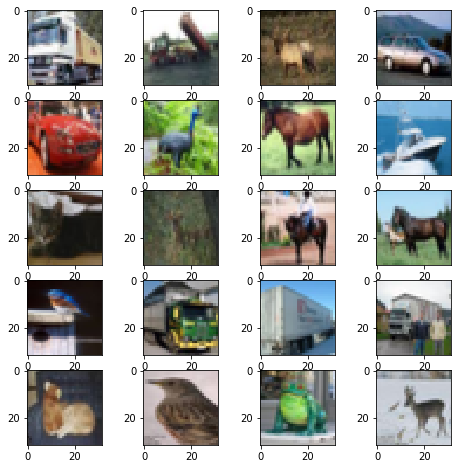

In [4]:
# SHOW SAMPLE

def plot_sample(class_names, train_images, train_label):
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):
        img = train_images[i]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

plot_sample(class_names, train_images, train_label)

#### DATA AUGMENTATION

In [5]:
def applyAugment(train_images, train_label, augment=None):
    
    new_images = train_images

    def rotate(x):
        return tf.image.rot90(x, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    def color(x):
        
        x = tf.image.random_hue(x, 0.08)
        x = tf.image.random_saturation(x, 0.6, 1.6)
        x = tf.image.random_brightness(x, 0.05)
        x = tf.image.random_contrast(x, 0.7, 1.3)
        return x
    
    
    def flip(x):

        x = tf.image.random_flip_left_right(x)
        x = tf.image.random_flip_up_down(x)

        return x
    
    def allAugment(x):
        return rotate(color(flip(x)))
    
    try:
        i = 0
        while i < len(new_images):
            new_images[i] = locals()[augment](new_images[i])
            i += 1
    except Exception as e:
        print("no augmentation called ", augment, e)
    
    train_images = np.concatenate((train_images, new_images), axis=0)
    train_label = np.concatenate((train_label, train_label), axis=0)
    
    return train_images, train_label
        
    
# UNCOMENT TO APPLY DATA AUGMENTATION
# ROTATION - COLORISATION - FLIP - ALL

#train_images, train_label = applyAugment(train_images, train_label, "allAugment")
#print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)
#plot_sample(class_names, train_images, train_label)

#### FORMAT DATA

In [6]:
train_images = train_images / 255
test_images = test_images / 255

#### MODEL

In [7]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(3072, activation=relu))
    model.add(Dropout(0.1))
    model.add(Dense(1536, activation=relu))
    model.add(Dropout(0.2))
    model.add(Dense(718, activation=relu))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

#### TRAIN

In [8]:
# parameters
EPOCHS = 200
BATCH_SIZE=8192

# tensorboard
log = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log, histogram_freq=1)

model = create_model()
print(model.summary())
model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/mlp/')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 718)               1103566   
_________________________________________________________________
dropout_2 (Dropout)          (None, 718)               0

KeyboardInterrupt: 

In [9]:
%tensorboard --logdir logs/fit